## ML Problem
### Dataset Description:


Mammography is the most effective method for breast cancer screening available today. However, the low
positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies,
several computer-aided diagnoses (CAD) systems have been proposed in the last years. These systems help
physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to
perform a short-term follow-up examination instead.
This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from
BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-
RADS attributes together with the ground truth (the severity field).


### Attribute Information:
1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)



### Pre-requisite: Python environment setup for Jupyter notebook is mandatory.
#### Instructions:
    a. You can use any libraries of your choice in python.
    b. Provide the code in a notebook with the format Your_Name.ipynb
    c. The notebook should run without errors and should also display outputs and
visualizations.
####  Evaluation Task:
Download the dataset from attached file and perform the following tasks:
1. Build Statistical Classification model to detect severity
2. What considerations have been used for model selection?
3. What features would you want to create for your prediction model based on data provided?
4. How have you performed hyper-parameter tuning and model optimization? What are the reasons for your decision choices for these steps?
5. What is your model evaluation criteria? What are the assumptions and limitations of your approach?
6. Determine whether the data is normally distributed visually and statistically.
7. Comment on EDA of variables in data.
8. How are you detecting and treating outliers in the dataset for better convergence?
9. What techniques have been used for treating missing values to prepare features for model building?
10. What is the distribution of target with respect to categorical columns?
11. Comment on any other observations or recommendations based on your analysis.

## EDA


#### Import important libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#### Path of the Train & Test Data

### *********** NOTE : Please change the path of the model of the training and testing file. ***********

In [2]:
TRAIN_PATH = '/home/FedEx_DS_CaseStudy/ML problem/Train.xlsx'
TESTING_PATH = '/home/FedEx_DS_CaseStudy/ML problem/Test.xlsx'

#### Read DataFrame

In [3]:
df_ml = pd.read_excel(TRAIN_PATH)

In [4]:
df_ml

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...,...
806,807,5.0,62.0,irregular,ill-defined,iso,1
807,808,4.0,56.0,oval,circumscribed,low,0
808,809,5.0,58.0,irregular,ill-defined,low,1
809,810,4.0,NaN,round,ill-defined,low,0


#### Understand the Data Type and null value estimation.

In [5]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         811 non-null    int64  
 1   BI_RADS       809 non-null    float64
 2   Age           723 non-null    float64
 3   Shape         781 non-null    object 
 4   Margin        764 non-null    object 
 5   Mass_Density  735 non-null    object 
 6   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


#### Feature Distribution and reach of feature

In [6]:
df_ml.describe()

,Index,BI_RADS,Age,Severity
count,811.000000,809.000000,723.000000,811.000000
mean,406.000000,4.379481,55.887967,0.459926
std,234.259827,1.914800,16.886616,0.498699
min,1.000000,0.000000,5.000000,0.000000
25%,203.500000,4.000000,45.000000,0.000000
50%,406.000000,4.000000,56.000000,0.000000
75%,608.500000,5.000000,66.000000,1.000000
max,811.000000,55.000000,130.000000,1.000000


####  Feature 1 :  BI_RADS

Text(0, 0.5, 'Frequency')

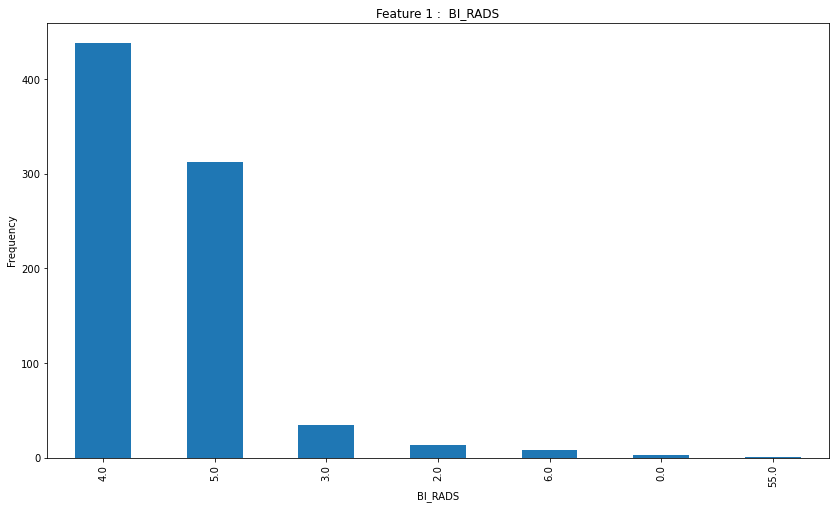

In [7]:
ax_1 = df_ml['BI_RADS'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 1 :  BI_RADS")
ax_1.set_xlabel("BI_RADS")
ax_1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

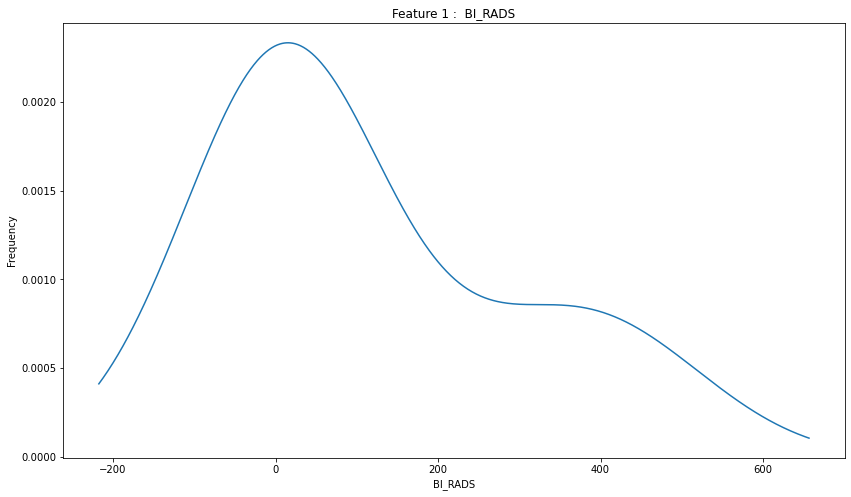

In [8]:
ax_1 = df_ml['BI_RADS'].value_counts().plot(kind='kde',figsize=(14,8),title="Feature 1 :  BI_RADS")
ax_1.set_xlabel("BI_RADS")
ax_1.set_ylabel("Frequency")

In [9]:
ax_1 = df_ml['BI_RADS'].value_counts()
ax_1

4.0     438
5.0     312
3.0      34
2.0      13
6.0       8
0.0       3
55.0      1
Name: BI_RADS, dtype: int64

In [10]:
df_ml = df_ml.loc[(df_ml['BI_RADS'] > 0) & (df_ml['BI_RADS'] <6)]
df_ml

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...,...
806,807,5.0,62.0,irregular,ill-defined,iso,1
807,808,4.0,56.0,oval,circumscribed,low,0
808,809,5.0,58.0,irregular,ill-defined,low,1
809,810,4.0,NaN,round,ill-defined,low,0


#### As mentioned, we need just relavent data and remove outliers which leads to loss of 1.5% data loss. 


In [11]:
df_ml['BI_RADS']= df_ml['BI_RADS'].fillna(method ='ffill')

<ipython-input-11-4a6701409ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['BI_RADS']= df_ml['BI_RADS'].fillna(method ='ffill')


In [12]:
df_ml.describe()

,Index,BI_RADS,Age,Severity
count,797.000000,797.000000,710.000000,797.000000
mean,403.160602,4.316186,55.763380,0.456713
std,233.400607,0.632377,16.943957,0.498435
min,1.000000,2.000000,5.000000,0.000000
25%,201.000000,4.000000,45.000000,0.000000
50%,402.000000,4.000000,56.000000,0.000000
75%,604.000000,5.000000,66.000000,1.000000
max,811.000000,5.000000,130.000000,1.000000


#### Feature 2: Age

Text(0, 0.5, 'Frequency')

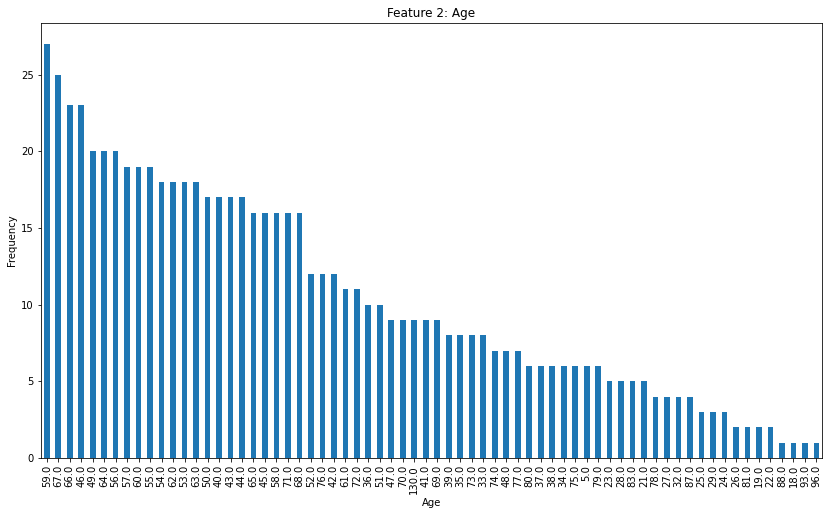

In [13]:
ax_2 = df_ml['Age'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 2: Age")
ax_2.set_xlabel("Age")
ax_2.set_ylabel("Frequency")

In [14]:
df_ml['Age'].skew()

0.6527978520214929

In [15]:
df_ml['Age']= df_ml['Age'].fillna(method ='ffill')

<ipython-input-15-61d779bc57b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Age']= df_ml['Age'].fillna(method ='ffill')


In [16]:
df_ml['Age'] = df_ml['Age'].apply(lambda x: 'Youth' if x<=30 else ('Senior_Citizen' if x > 65 else ('Younger_adult' if x > 30 and x <= 40 else ('Adult' if x > 40 and x <= 50 else 'Older_adult'))))

df_ml['Age']


<ipython-input-16-62b2ca73015d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Age'] = df_ml['Age'].apply(lambda x: 'Youth' if x<=30 else ('Senior_Citizen' if x > 65 else ('Younger_adult' if x > 30 and x <= 40 else ('Adult' if x > 40 and x <= 50 else 'Older_adult'))))


0      Senior_Citizen
1               Adult
2         Older_adult
3               Youth
4      Senior_Citizen
            ...      
806       Older_adult
807       Older_adult
808       Older_adult
809       Older_adult
810    Senior_Citizen
Name: Age, Length: 797, dtype: object

Text(0, 0.5, 'Frequency')

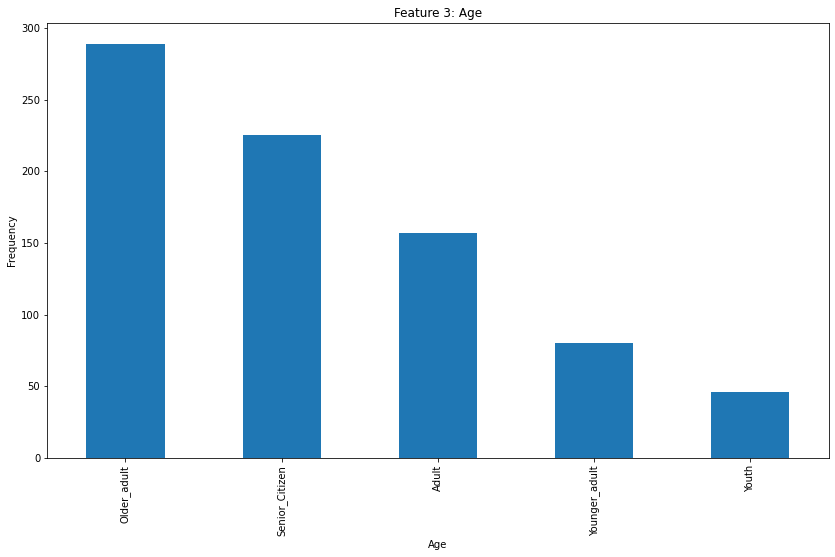

In [58]:
ax_2 = df_ml['Age'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 3: Age")
ax_2.set_xlabel("Age")
ax_2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

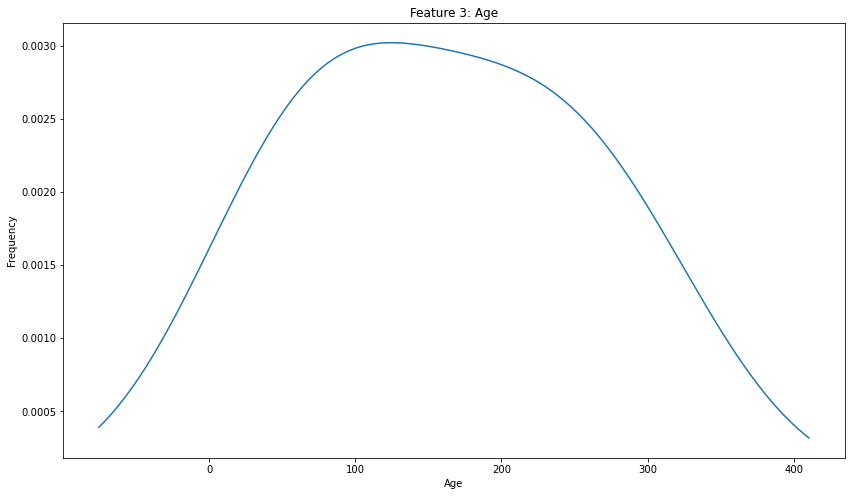

In [59]:
ax_2 = df_ml['Age'].value_counts().plot(kind='kde',figsize=(14,8),title="Feature 3: Age")
ax_2.set_xlabel("Age")
ax_2.set_ylabel("Frequency")

#### Feature 3: Shape

Text(0, 0.5, 'Frequency')

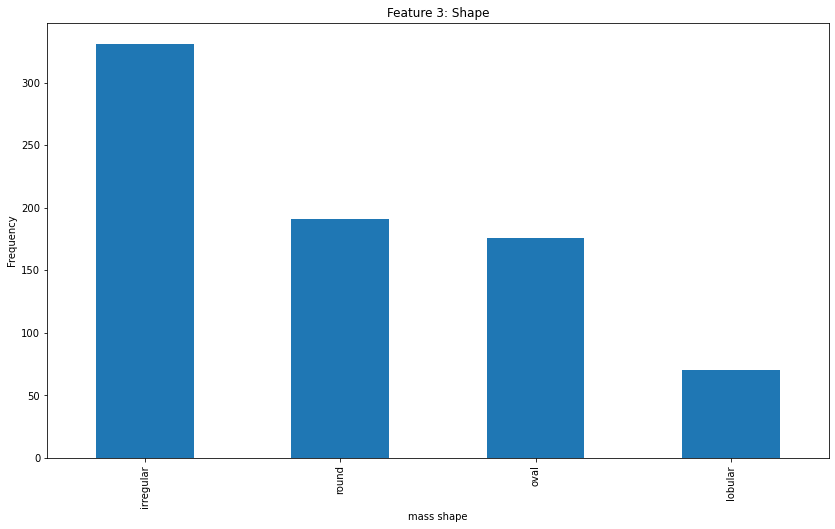

In [17]:
ax_3 = df_ml['Shape'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 3: Shape")
ax_3.set_xlabel("mass shape")
ax_3.set_ylabel("Frequency")

In [18]:
ax_3 = df_ml['Shape'].value_counts()
ax_3

irregular    331
round        191
oval         176
lobular       70
Name: Shape, dtype: int64

In [19]:
df_ml['Shape']= df_ml['Shape'].fillna( method ='ffill')

<ipython-input-19-7509c5bfa49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Shape']= df_ml['Shape'].fillna( method ='ffill')


In [20]:
ax_3 = df_ml['Shape'].value_counts()
ax_3

irregular    340
round        200
oval         185
lobular       72
Name: Shape, dtype: int64

Text(0, 0.5, 'Frequency')

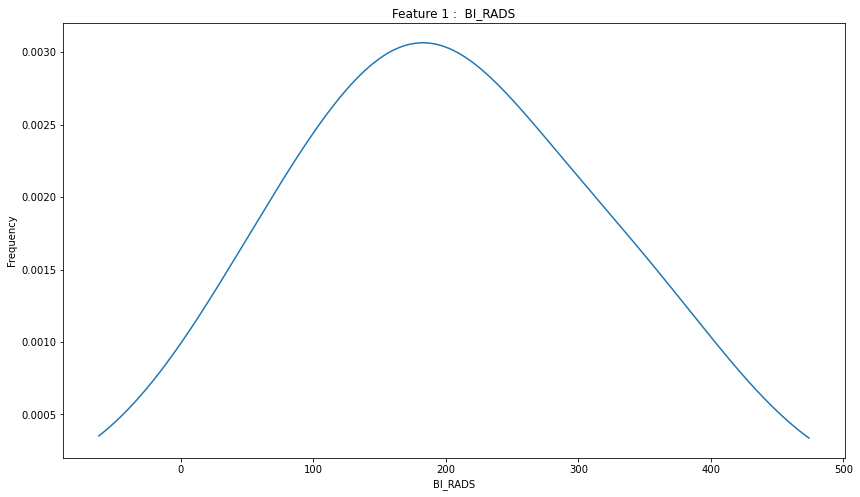

In [21]:
ax_3 = df_ml['Shape'].value_counts().plot(kind='kde',figsize=(14,8),title="Feature 1 :  BI_RADS")
ax_3.set_xlabel("BI_RADS")
ax_3.set_ylabel("Frequency")

#### Feature 4: Margin

Text(0, 0.5, 'Frequency')

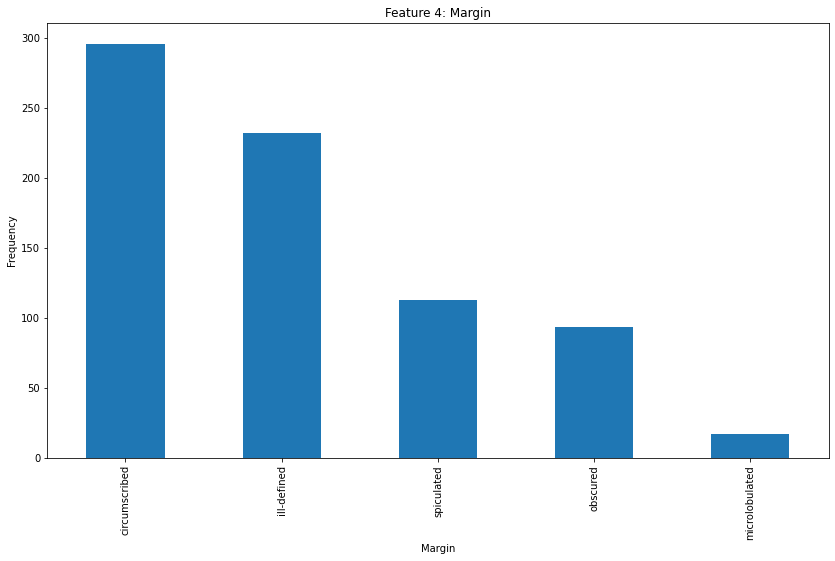

In [22]:
ax_4 = df_ml['Margin'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 4: Margin")
ax_4.set_xlabel("Margin")
ax_4.set_ylabel("Frequency")

In [23]:
ax_4 = df_ml['Margin'].value_counts()
ax_4

circumscribed     296
ill-defined       232
spiculated        113
obscured           94
microlobulated     17
Name: Margin, dtype: int64

In [24]:
df_ml['Margin']= df_ml['Margin'].fillna( method ='ffill')


<ipython-input-24-e7b15aad6a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Margin']= df_ml['Margin'].fillna( method ='ffill')


In [25]:
ax_4 = df_ml['Margin'].value_counts()
ax_4

circumscribed     316
ill-defined       248
spiculated        118
obscured           96
microlobulated     19
Name: Margin, dtype: int64

Text(0, 0.5, 'Frequency')

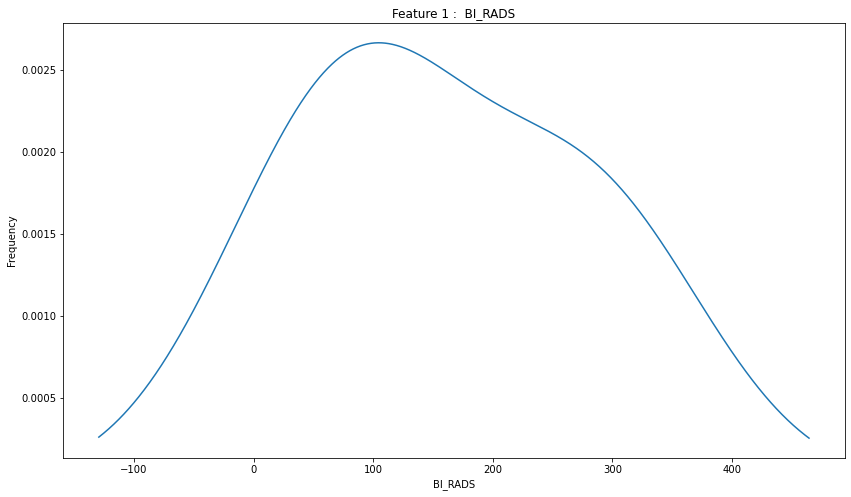

In [26]:
ax_4 = df_ml['Margin'].value_counts().plot(kind='kde',figsize=(14,8),title="Feature 1 :  BI_RADS")
ax_4.set_xlabel("BI_RADS")
ax_4.set_ylabel("Frequency")

#### Feature 5: Mass_Density

Text(0, 0.5, 'Frequency')

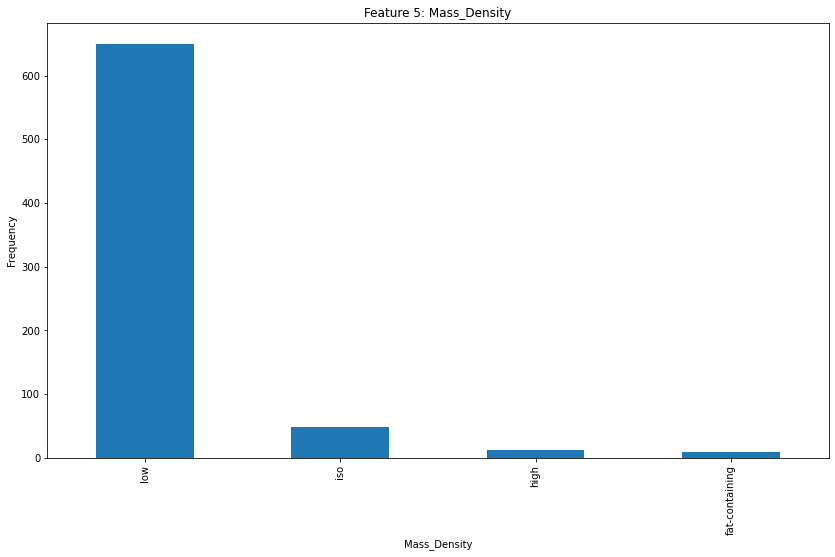

In [27]:
ax_5 = df_ml['Mass_Density'].value_counts().plot(kind='bar',figsize=(14,8),title="Feature 5: Mass_Density")
ax_5.set_xlabel("Mass_Density")
ax_5.set_ylabel("Frequency")

In [28]:
ax_5 = df_ml['Mass_Density'].value_counts()
ax_5

low               650
iso                49
high               12
fat-containing     10
Name: Mass_Density, dtype: int64

In [29]:
df_ml['Mass_Density']= df_ml['Mass_Density'].fillna( method ='ffill')

<ipython-input-29-aa461de1b7f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Mass_Density']= df_ml['Mass_Density'].fillna( method ='ffill')


In [30]:
ax_5 = df_ml['Mass_Density'].value_counts()
ax_5

low               710
iso                59
high               18
fat-containing     10
Name: Mass_Density, dtype: int64

#### Output : Severity

Text(0, 0.5, 'Frequency')

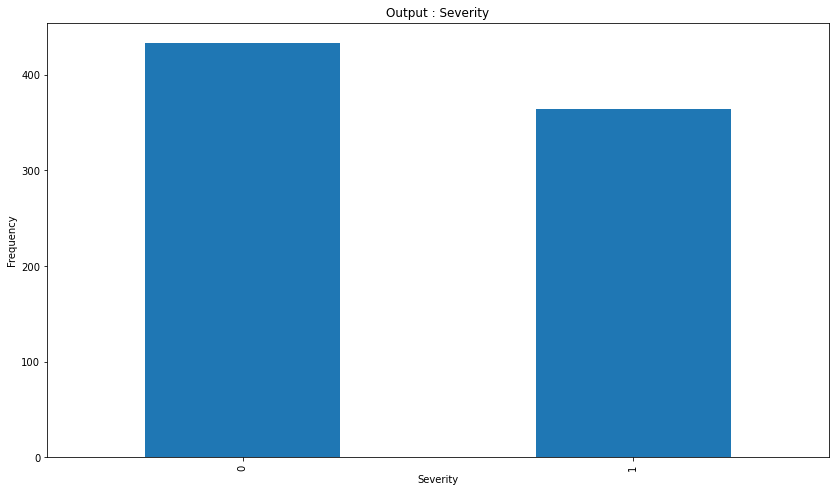

In [31]:
ax = df_ml['Severity'].value_counts().plot(kind='bar',figsize=(14,8),title="Output : Severity")
ax.set_xlabel("Severity")
ax.set_ylabel("Frequency")

In [32]:
ax_6 = df_ml['Severity'].value_counts()
ax_6

0    433
1    364
Name: Severity, dtype: int64

In [33]:
df_ml

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,Senior_Citizen,lobular,spiculated,low,1
1,2,4.0,Adult,round,circumscribed,low,1
2,3,5.0,Older_adult,irregular,spiculated,low,1
3,4,4.0,Youth,round,circumscribed,low,0
4,5,5.0,Senior_Citizen,round,spiculated,low,1
...,...,...,...,...,...,...,...
806,807,5.0,Older_adult,irregular,ill-defined,iso,1
807,808,4.0,Older_adult,oval,circumscribed,low,0
808,809,5.0,Older_adult,irregular,ill-defined,low,1
809,810,4.0,Older_adult,round,ill-defined,low,0


                 Index   BI_RADS       Age     Shape    Margin  Mass_Density  \
Index         1.000000 -0.009920 -0.043311  0.047199 -0.018588      0.176336   
BI_RADS      -0.009920  1.000000  0.317843  0.481145  0.496282      0.072588   
Age          -0.043311  0.317843  1.000000  0.314589  0.347058      0.063070   
Shape         0.047199  0.481145  0.314589  1.000000  0.675063      0.073564   
Margin       -0.018588  0.496282  0.347058  0.675063  1.000000      0.053359   
Mass_Density  0.176336  0.072588  0.063070  0.073564  0.053359      1.000000   
Severity      0.032489  0.597486  0.371037  0.544922  0.543836      0.079371   

              Severity  
Index         0.032489  
BI_RADS       0.597486  
Age           0.371037  
Shape         0.544922  
Margin        0.543836  
Mass_Density  0.079371  
Severity      1.000000  


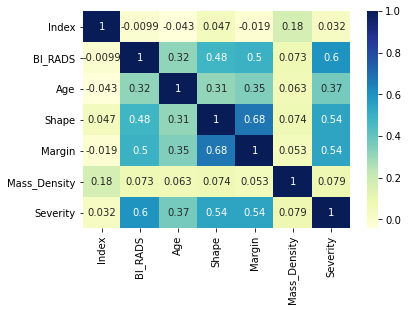

In [34]:
df_ml_2 = copy.deepcopy(df_ml)
 
w = {'Youth':1, 'Younger_adult':2, 'Adult':3,'Older_adult':4, 'Senior_Citizen':5}
x = {'high':1, 'iso':2, 'low':3,'fat-containing':4}
y = {'round':1, 'oval':2,'lobular':3,'irregular':4}
z = {'circumscribed':1,'microlobulated':2, 'obscured':3,'ill-defined':4, 'spiculated':5}
df_ml_2['Age'], df_ml_2['Mass_Density'], df_ml_2['Shape'], df_ml_2['Margin'] = df_ml_2['Age'].map(w), df_ml_2['Mass_Density'].map(x), df_ml_2['Shape'].map(y), df_ml_2['Margin'].map(z)

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df_ml_2.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df_ml_2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()



In [35]:


X = df_ml_2.iloc[:,1:6].to_numpy()

y = df_ml_2['Severity'].to_numpy()

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=115, shuffle=True)
# create model
model = RandomForestClassifier(max_depth=3,random_state=115)
model.fit(X, y)

print(model.predict([[5.0,20.0,1,1,3]]))
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))
print("Testing Accuracy of the model is {0:.3f}.".format(scores.mean()))

[1]
[0.85       0.8625     0.875      0.8125     0.825      0.8375
 0.8625     0.81012658 0.82278481 0.86075949]
Accuracy: 0.842 (0.022)
Testing Accuracy of the model is 0.842.


#### Testing Function

In [52]:
def model_testing(TESTING_PATH):
    df_test = pd.read_excel(TESTING_PATH)
    df_test_1 = df_test.fillna( method ='ffill')
    df_test_1['Age'] = df_test_1['Age'].apply(lambda x: 'Youth' if x<=30 else ('Senior_Citizen' if x > 65 else ('Younger_adult' if x > 30 and x <= 40 else ('Adult' if x > 40 and x <= 50 else 'Older_adult'))))
    w = {'Youth':1, 'Younger_adult':2, 'Adult':3,'Older_adult':4, 'Senior_Citizen':5}
    x = {'high':1, 'iso':2, 'low':3,'fat-containing':4}
    y = {'round':1, 'oval':2,'lobular':3,'irregular':4}
    z = {'circumscribed':1,'microlobulated':2, 'obscured':3,'ill-defined':4, 'spiculated':5}
    df_test_1['Age'], df_test_1['Mass_Density'], df_test_1['Shape'], df_test_1['Margin'] = df_test_1['Age'].map(w), df_test_1['Mass_Density'].map(x), df_test_1['Shape'].map(y), df_test_1['Margin'].map(z)
    df_test_1 = df_test_1.iloc[:,1:6].to_numpy()
    testing = []

    correct_scores = 0
    for i in range(len(df_test_1)):
        test = df_test_1[i]
#         print(test)
#         print(model.predict([test]))
        testing.append(model.predict([test])[0])
    

    for i in range(len(testing)):
#         print(testing[i],df_test.iloc[:,6].to_numpy()[i])
        if testing[i] == df_test.iloc[:,6].to_numpy()[i]:
            correct_scores += 1
    Test_accuracy = correct_scores/len(testing) 
    print(correct_scores,len(testing),Test_accuracy)
    return "Testing Accuracy of the model is {0:.2f}%.".format(Test_accuracy*100)

In [53]:
print(model_testing(TESTING_PATH))

126 150 0.84
Testing Accuracy of the model is 84.00%.


What considerations have been used for model selection?
1. Random Forest is a classification model which handles missing values quite well and easily distributed into based on the entropy. 



What features would you want to create for your prediction model based on data provided?
1. Created Age as an categorical feature, as their is a clear distribution of Age to Severity, and Categorical distribution is been setup for model understanding.


How have you performed hyper-parameter tuning and model optimization? What are the reasons for your decision choices for these steps?
1. Selecting the different depth of tress, finally moving with proven 'n-2' depth approach which works well in this case too. AMpart from this went with model comparision with model model accuracy and finally selecting the best accuracy model.



What is your model evaluation criteria? What are the assumptions and limitations of your approach?
1. Went with Accuracy evaluation criteria, which is an all time favariote metric. Yes, it does have some limitations as it just focus on the correct output and working on the worng predictions is not taken care off. 


How are you detecting and treating outliers in the dataset for better convergence?
1. Here, the data is very clear and did not any special plot to identify the outliers from the data. Bar plot and value_counts did the work in this case.

What techniques have been used for treating missing values to prepare features for model building?
1. Missing values is always very concering thing in the EDA part but as the data is quite normal form thus we went with very intiall step of forward filling of the data.